In [ ]:
# import torch
# torch.cuda.current_device()
# torch.cuda.device_count()


In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import pandas as pd
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = '/home/paperspace/Desktop/data/dogbreeds/'

sz=224
arch=resnet34
bs=48

label_csv = f'{PATH}labels.csv'

#list of rows, minus 1, nubmer of rows in CSV, number of imgs
numrows = len(list(open(label_csv)))-1

# get crossvalidation indexes (20% validation set)
val_idxs = get_cv_idxs(numrows)

In [4]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train' ,f'{PATH}labels.csv', test_name='test', val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    return data if sz > 300 else data.resize(340, 'tmp')

In [5]:
data = get_data(sz,bs)

A Jupyter Widget

In [6]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

A Jupyter Widget

 82%|████████▏ | 140/171 [00:01<00:00, 77.30it/s, loss=15.9]


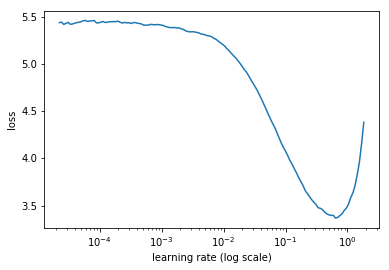

In [7]:
lrf = learn.lr_find()
learn.sched.plot()

In [8]:
learn.fit(1e-2, 5)

A Jupyter Widget

[ 0.       1.74359  0.88535  0.7889 ]                        
[ 1.       0.95285  0.62826  0.82247]                         
[ 2.       0.72308  0.55909  0.83126]                         
[ 3.       0.61586  0.52533  0.83451]                         
[ 4.       0.56242  0.49694  0.83998]                         



In [9]:
learn.precompute=False
learn.fit(1e-2, 3, cycle_len=1) # trained on 224px images (sz variable)

A Jupyter Widget

[ 0.       0.61972  0.49143  0.84579]                        
[ 1.       0.60761  0.48106  0.84351]                        
[ 2.       0.56466  0.48278  0.83998]                        



A Jupyter Widget

 68%|██████▊   | 116/171 [01:16<00:36,  1.53it/s, loss=2.86]

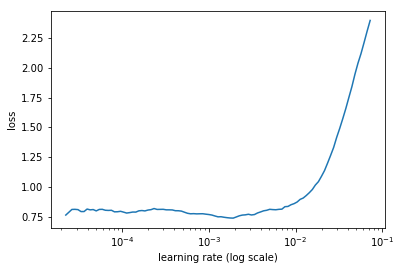

In [10]:
learn.unfreeze()
learn.lr_find()
learn.sched.plot()

In [ ]:
learn.fit(1e-4, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

Exception in thread Thread-18:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



Exception in thread Thread-17:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration






[ 0.       0.7401   0.57239  0.82281]                        
  0%|          | 0/171 [00:00<?, ?it/s]


Exception in thread Thread-17:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

